# 4. Clock Pendulum with Air Drag Damping

This notebook introduces the third fundamental characteristic of vibration: energy dissipation through damping. A compound pendulum system representing a clock pendulum is implemented that allows students to vary the damping parameters and visualize the three regimes of linear damping.

After the completion of this assignment students will be able to:

- understand the concept of damped natural frequency and its relationship to
  mass/inertia, stiffness, and damping
- state the three fundamental characteristics that make a system vibrate
- compute the free response of a linear system with viscous-damping in all
  three damping regimes
- identify critically damped, underdamped, and overdamped behavior
- determine whether a linear system is over/under/critically damped given its
  dynamic properties
- understand the difference between underdamping, overdamping, and crticial
  damping
  
## Introduction

Many clocks use a pendulum to keep time. Pendulum's have a very constant osicallation period and if designed with quality components take very little energy to run. There is a downside to pendulums though. Any friction in the pendulum's pivot joint or any air drag on the pendulum itself will cause the pendulum to slow stop oscillating and this energy dissaption will affect the period of oscillation. `resonance` includes a simple clock pendulum that represents a clock pendulum that looks like:

![](fig/04/clock-pendulum.png)

Import the pendulum as so:

In [1]:
from resonance.linear_systems import ClockPendulumSystem

In [2]:
sys = ClockPendulumSystem()

Check out its constants:

In [3]:
sys.constants

{'acc_due_to_gravity': 9.81,
 'bob_mass': 0.1,
 'bob_radius': 0.03,
 'rod_length': 0.2799,
 'rod_mass': 0.1,
 'viscous_damping': 0.0}

And the coordinates and speeds:

In [4]:
sys.coordinates

{'angle': 0.0}

In [5]:
sys.speeds

{'angle_vel': 0.0}

The system can be simulated as usual if the coordinates or speeds are set to some initial value.

In [6]:
import numpy as np

In [7]:
sys.coordinates['angle'] = np.deg2rad(5.0)

In [8]:
traj = sys.free_response(5.0)

And a plot can be shown:

In [9]:
import matplotlib.pyplot as plt

In [10]:
%matplotlib notebook

<IPython.core.display.Javascript object>


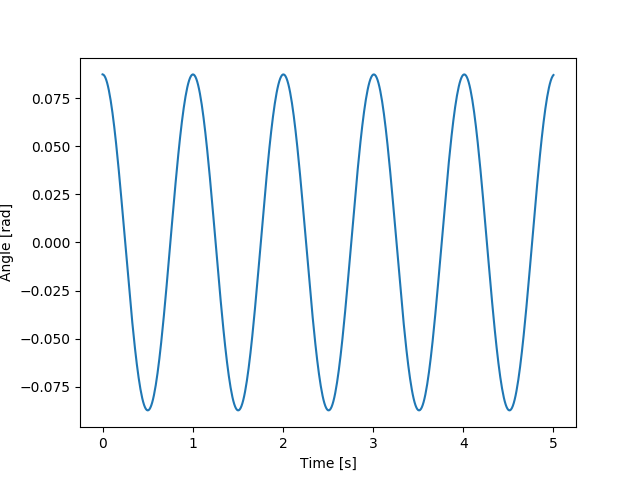

In [11]:
fig, ax = plt.subplots(1, 1)
ax.plot(traj.index, traj.angle)
ax.set_ylabel('Angle [rad]')
ax.set_xlabel('Time [s]');

The above simulation shows that we get a sinusoid oscillation with a period of about 1 second, which is good.

**Exercise**

Creative an interactive plot of the angle trajectory with a slider for the `viscous_damping` coefficient. The slider shoudl go from 0.0 to 5.0 with step of 0.1. The code should follow this pattern, as before:

```python
fig, ax = plt.subplots(1, 1)

sim_line = ax.plot(traj.index, traj.angle)[0]
ax.set_ylim((-sys.coordinates['angle'], sys.coordinates['angle']))

ax.set_ylabel('Angle [rad]')
ax.set_xlabel('Time [s]')

def plot_trajectory(viscous_damping=0.0):
    # fill out this function so that the plot will update with a slider.

plot_trajectory()
```

<IPython.core.display.Javascript object>


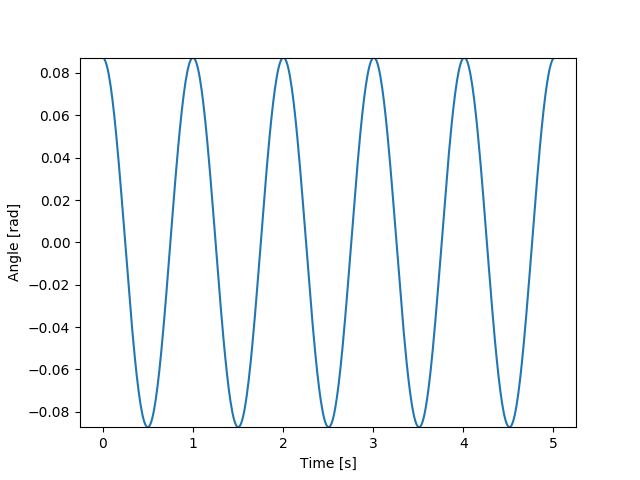

In [12]:
fig, ax = plt.subplots(1, 1)

sim_line = ax.plot(traj.index, traj.angle)[0]
ax.set_ylim((-sys.coordinates['angle'], sys.coordinates['angle']))

ax.set_ylabel('Angle [rad]')
ax.set_xlabel('Time [s]')

def plot_trajectory(viscous_damping=0.0):
    sys.constants['viscous_damping'] = viscous_damping
    traj = sys.free_response(5.0)
    sim_line.set_data(traj.index, traj.angle)
    fig.canvas.draw()

plot_trajectory()

In [13]:
from ipywidgets import interact

In [14]:
widget = interact(plot_trajectory, damping=(0.0, 5.0, 0.1));

interactive(children=(FloatSlider(value=0.0, description='viscous_damping', max=1.0), Output()), _dom_classes=('widget-interact',))

# Visualize the Motion

In [15]:
sys.constants['viscous_damping'] = 0.2
frames_per_second = 30
traj = sys.free_response(5.0, sample_rate=frames_per_second)

<IPython.core.display.Javascript object>


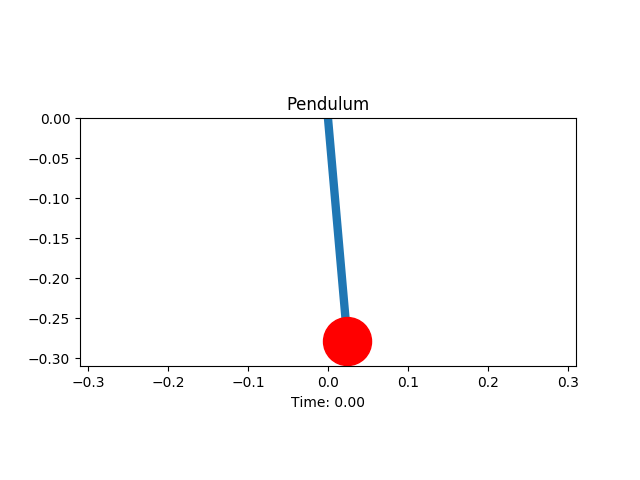

In [16]:
sys.animate_configuration(interval=1000 / frames_per_second);  # sample time in milliseconds

**Exercise**

Try out some of the values for the viscous damping that had interesting trajectories and see what the animation looks like.

# Oscillation Period and Viscous Damping

You may have noticed that the period seems to change with different viscous damping values. It is worth investigating this more thoroughly.

**Exercise**

Use your function for estimating the period of a trajectory in a loop to collect period estimates for 30 values of viscous damping from 0.0 to 5.0. The code for the loop should be structured like:

```python
viscous_damping_vals = np.linspace(0.0, 5.0, num=30)
periods = []
for c in viscous_damping_vals:
    sys.constants['viscous_damping'] = c
    traj = sys.free_response(5.0)
    periods.append(estimate_period(traj.index, traj.angle))
```

/home/moorepants/src/resonance/resonance/functions.py:22: RuntimeWarning: Mean of empty slice.
  period = np.diff(time[peak_idxs]).mean()
/home/moorepants/miniconda3/envs/resonance-dev/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


<IPython.core.display.Javascript object>


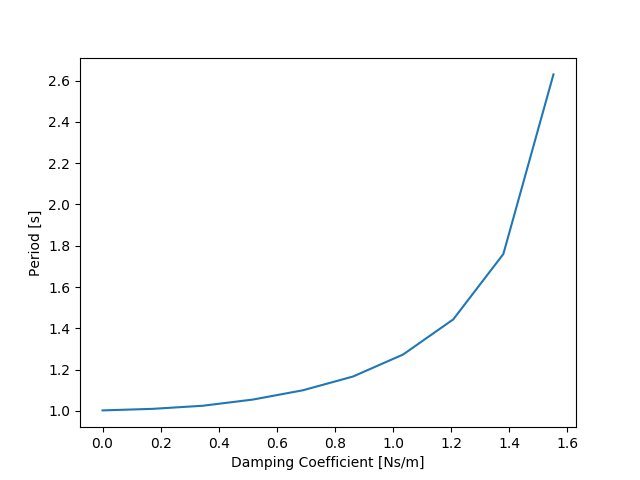

In [17]:
from resonance.functions import estimate_period

viscous_damping_vals = np.linspace(0.0, 5.0, num=30)
periods = []
for c in viscous_damping_vals:
    sys.constants['viscous_damping'] = c
    traj = sys.free_response(5.0)
    periods.append(estimate_period(traj.index, traj.angle))
    
fig, ax = plt.subplots(1, 1)
ax.set_xlabel('Damping Coefficient [Ns/m]')
ax.set_ylabel('Period [s]')
ax.plot(viscous_damping_vals, periods);

**Exercise**

Have a look at the `periods` list and see if anything is unusual. Use the same loop as above but investigate viscoud damping values around the value that causes issues and see if you can determine how high the viscous damping value can be for a valid result.

In [18]:
viscous_damping_vals = np.linspace(1.5, 1.7, num=50)
periods = []
for c in viscous_damping_vals:
    sys.constants['viscous_damping'] = c
    traj = sys.free_response(5.0)
    periods.append(estimate_period(traj.index, traj.angle))

viscous_damping_vals[np.isnan(periods)]

/home/moorepants/src/resonance/resonance/functions.py:22: RuntimeWarning: Mean of empty slice.
  period = np.diff(time[peak_idxs]).mean()
/home/moorepants/miniconda3/envs/resonance-dev/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


array([ 1.60612245,  1.61020408,  1.61428571,  1.61836735,  1.62244898,
        1.62653061,  1.63061224,  1.63469388,  1.63877551,  1.64285714,
        1.64693878,  1.65102041,  1.65510204,  1.65918367,  1.66326531,
        1.66734694,  1.67142857,  1.6755102 ,  1.67959184,  1.68367347,
        1.6877551 ,  1.69183673,  1.69591837,  1.7       ])

# Energy

At any given configuration dynamic systems potentially have both potential energy and kinetic energy. Recall that the potential energy of a mass that is lifted above ground in a gravitational field is:

$$ PE = mgh$$

where $m$ is the mass of the object, $g$ is the acceleration due to gravity, and $h$ is the height above the ground. Additionally, the translational and rotational kinetic energy of a planar rigid body can be expressed as:

$$ KE = \frac{m v^2}{2} + \frac{I \omega^2}{2} $$

where $m$ is the mass of the body, $v$ is the magnitude of the linear velocity of the center of mass, $I$ is the centroidal moment of inertia of the rigid body, and $\omega$ is the angular velocity of the rigidbody.

For example the bob of the pendulum has:

$$ PE_{bob} = m_{bob} g l (1 - \cos{\theta}) $$

and

$$ KE_{bob} = {m_{bob} (l \dot{\theta})^2}{2} + \frac{(m_{bob} r^2 / 2 + m_{bob} l^2)\dot{\theta}^2}{2} $$

You can add a measurement for this that looks like:

```python
def kinetic_energy(bob_mass, bob_radius, rod_length, bob_height, rod_mass, angle_vel):
    
    v_bob = rod_length * angle_vel
    I_bob = bob_mass * bob_radius**2 / 2.0 + bob_mass * rod_length**2
    KE_bob = bob_mass * v_bob**2 / 2.0 + I_bob * angle_vel**2 / 2.0 
     
    v_rod =
    I_rod =
    KE_rod = 
 
    return KE_rod + KE_bob
```

**Exercise**

Add a measurement to the system that outputs the kinetic energy in the trajectory data frame from `free_response`.

In [19]:
def kinetic_energy(bob_mass, bob_radius, rod_length, bob_height, rod_mass, angle_vel):
    v_rod_com = rod_length / 2.0 * angle_vel
    v_bob = rod_length * angle_vel
    I_rod = rod_mass * rod_length**2 / 3
    I_bob = bob_mass * bob_radius**2 / 2.0 + bob_mass * rod_length**2
    KE_rod = rod_mass * v_rod_com**2 / 2.0 + I_rod * angle_vel**2 / 2.0
    KE_bob = bob_mass * v_bob**2 / 2.0 + I_bob * angle_vel**2 / 2.0
    return KE_rod + KE_bob

sys.add_measurement('kinetic_energy', kinetic_energy)

sys.measurements['kinetic_energy']

def potential_energy(bob_mass, rod_mass, rod_length, bob_height, acc_due_to_gravity, angle):
    PE_bob = bob_mass * acc_due_to_gravity * (rod_length - rod_length * np.cos(angle))
    PE_rod = rod_mass * acc_due_to_gravity * (rod_length / 2 - rod_length / 2 * np.cos(angle))
    return PE_bob + PE_rod

sys.add_measurement('potential_energy', potential_energy)

sys.measurements['potential_energy']

0.0015673005420631827

**Exercise**

Investigate what happens to the kinetic energy if the viscous damping value is increased.

<IPython.core.display.Javascript object>


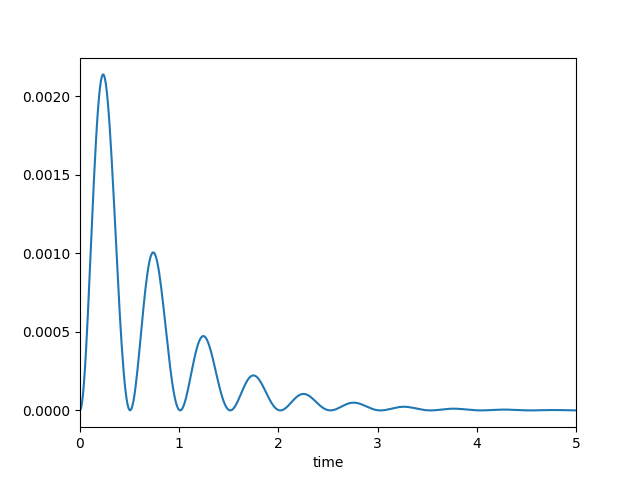

In [20]:
sys.constants['viscous_damping'] = 0.2
traj = sys.free_response(5.0)
plt.figure()
traj.kinetic_energy.plot();

# Log Decrement

The time constant of an exponential decaying oscillation, $\tau$, is defined as:

$$ x(t) = e^{t/\tau} $$

$\tau$ is the time it takes for the function to decay to $1 - 1/e$ which is about 63.2% of the starting value.

Another useful value that is related is the log decrement $\delta$, which is the ratio of the period of osciallation to the time constant. It is defined as:

$$\delta = ln \frac{x(t)}{x(t+T)} = T / \tau $$

**Exercise**

Using a value of 0.2 for the viscous damping and 2 degrees as an initial angle, create a free response and determine the log decrement of decayed osciallation.

In [21]:
sys.constants['viscous_damping'] = 0.2
sys.coordinates['angle'] = np.deg2rad(2.0)
sys.speeds['angle_vel'] = 0.0
traj = sys.free_response(10.0, sample_rate=200)

<IPython.core.display.Javascript object>


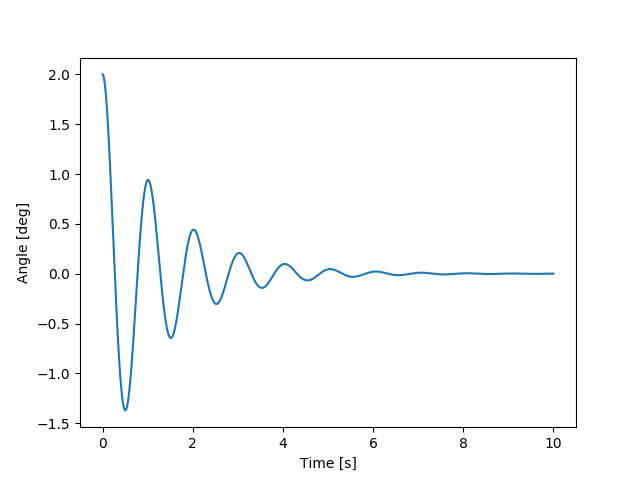

In [22]:
fig, ax = plt.subplots(1, 1)
ax.plot(traj.index, np.rad2deg(traj.angle))
ax.set_xlabel('Time [s]')
ax.set_ylabel('Angle [deg]');

In [23]:
t = 0.75
T = estimate_period(traj.index, traj.angle)
delta = np.log(traj.angle[t] / traj.angle[round(t + T, 3)])
delta

0.75517619198480967

# Underdamped

When the viscous damping value is relatively low, a very nice decayed oscillation is present. This is called an underdamped oscillation because there is vibration, but it still dissipates.

**Exercise**

Create a single plot that shows the free response at these different viscoud damping values: 0.0, 0.08, 0.2, 1.6. Use an initial angle of 5 degrees and inital angular velocity of 0 deg/s. Include a legend so that it is clear which lines represent which values. Use a loop to reduce the amount of typing needed.

<IPython.core.display.Javascript object>


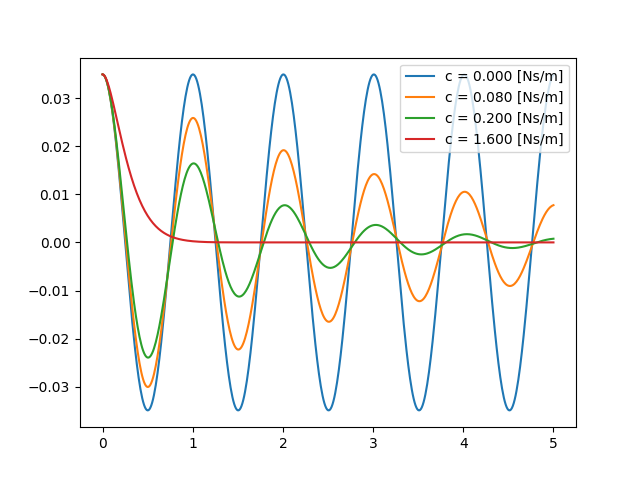

In [24]:
fig, ax = plt.subplots(1, 1)

for c in [0.0, 0.08, 0.2, 1.6]:
    sys.constants['viscous_damping'] = c
    traj = sys.free_response(5.0)
    ax.plot(traj.index, traj.angle, label='c = {:0.3f} [Ns/m]'.format(c))
    
ax.legend();

# Critically Damped

Above in the plot you created of the period of oscillation versus the viscous damping value, you should have discovered that when the value is at 1.6780754836568228 (or somewhere close) that there are no longer any oscillations. This boundary between oscillation and not oscillating wrt to the viscous damping value is called "critically damped" motion.

**Exercise**

Make a single plot of angle trajectories with the viscous damping value set to 1.6780754836568228 and an initial angle of 0.1 degrees. Plot three lines with the initial angular velocity as -10 degs, 0 degs, and 10 degrees.

<IPython.core.display.Javascript object>


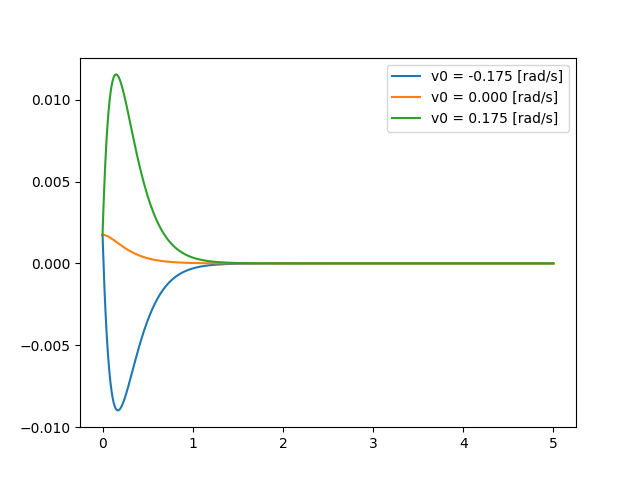

In [25]:
sys.constants['viscous_damping'] = 1.6780754836568228
sys.coordinates['angle'] = np.deg2rad(0.1)

fig, ax = plt.subplots(1, 1)

for v0 in [-np.deg2rad(10), 0, np.deg2rad(10)]:
    sys.speeds['angle_vel'] = v0
    traj = sys.free_response(5.0)
    ax.plot(traj.index, traj.angle, label='v0 = {:0.3f} [rad/s]'.format(v0))
    
ax.legend()

# Overdamped

Finally, if the viscous damping value is greater than the critical damping value, the motion is called over damped. There is no oscillation and with very high values of damping the system will rapidly decay.

**Exercise**

Create a single plot with the viscous damping value at 2.0 and these three sets of initial conditions:

- $\theta_0$ = 1 deg, $\dot{\theta}_0$ = 0 deg/s
- $\theta_0$ = 0 deg, $\dot{\theta}_0$ = 10 deg/s
- $\theta_0$ = -1 deg, $\dot{\theta}_0$ = 0 deg/s

<IPython.core.display.Javascript object>


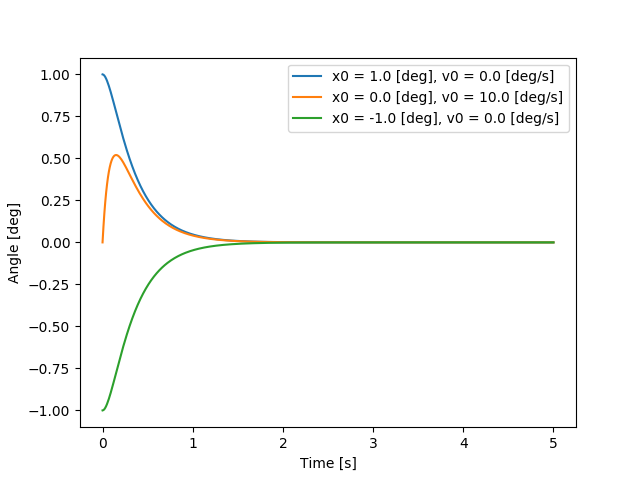

In [26]:
sys.constants['viscous_damping'] = 2.0

initial = ((np.deg2rad(1), 0.0),
           (0.0, np.deg2rad(10)),
           (-np.deg2rad(1), 0.0))

fig, ax = plt.subplots(1, 1)
ax.set_xlabel('Time [s]')
ax.set_ylabel('Angle [deg]')

for x0, v0 in initial:
    sys.coordinates['angle'] = x0
    sys.speeds['angle_vel'] = v0
    traj = sys.free_response(5.0)
    lab_temp = 'x0 = {:0.1f} [deg], v0 = {:0.1f} [deg/s]'
    ax.plot(traj.index, np.rad2deg(traj.angle),
            label=lab_temp.format(np.rad2deg(x0), np.rad2deg(v0)))
    
ax.legend();